In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("F:\yeshwanth\guvi\kaggle\car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [6]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [7]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [8]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [9]:
df['current'] = 2022

In [10]:
df['no_of_years'] = df['current']-df['Year']

In [11]:
df.drop(['current'],axis=1,inplace=True)

In [12]:
df.drop('Year',axis=1,inplace=True)


In [13]:
x = df.iloc[:,3:]

In [14]:
df.drop('Car_Name',axis=1,inplace=True)

In [15]:
final = pd.get_dummies(df,drop_first=True)

In [16]:
final

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


In [17]:
final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [18]:
import seaborn as sns


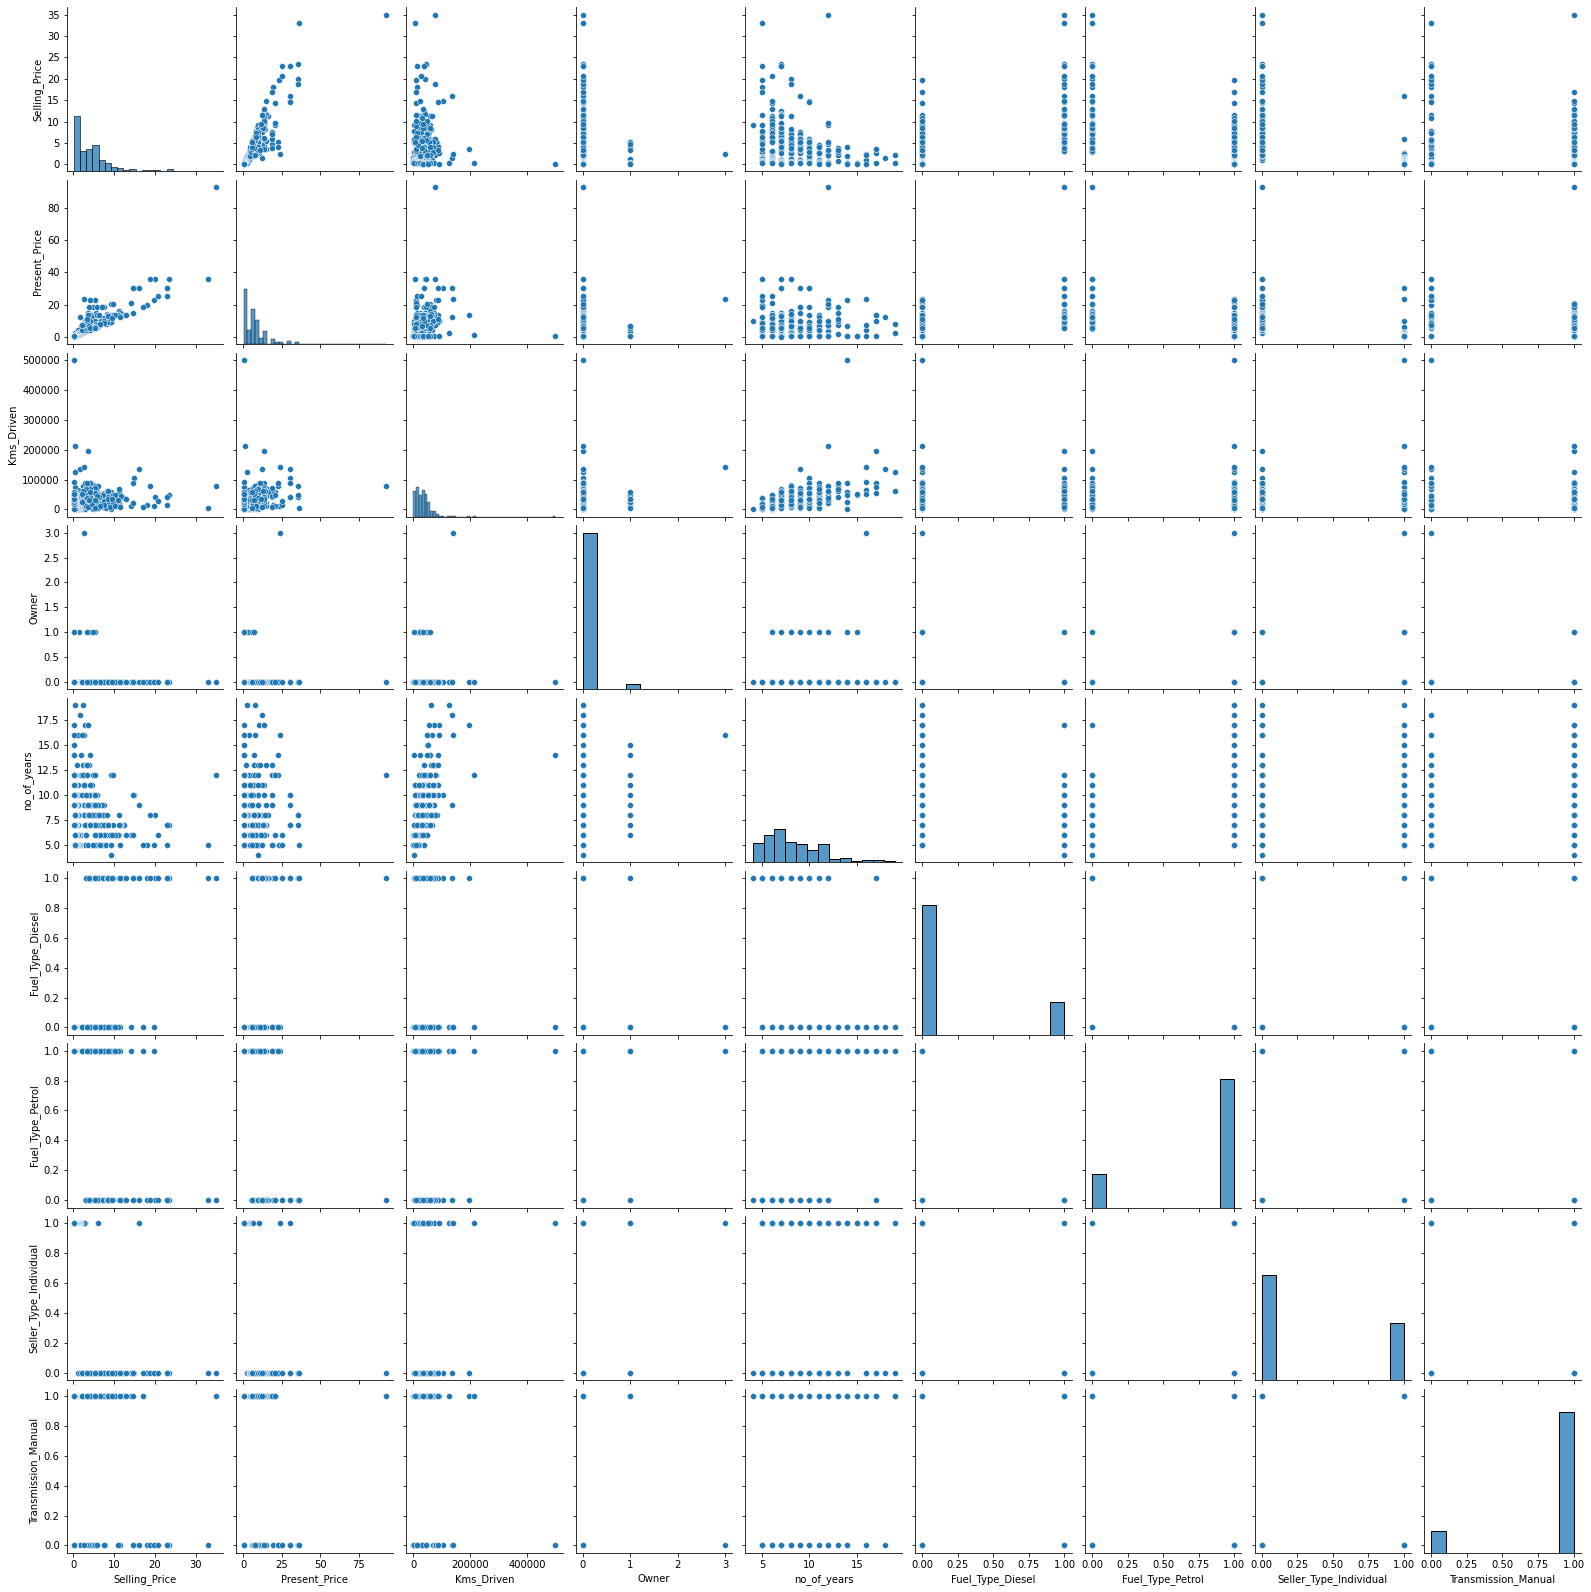

In [19]:
sns.pairplot(final)

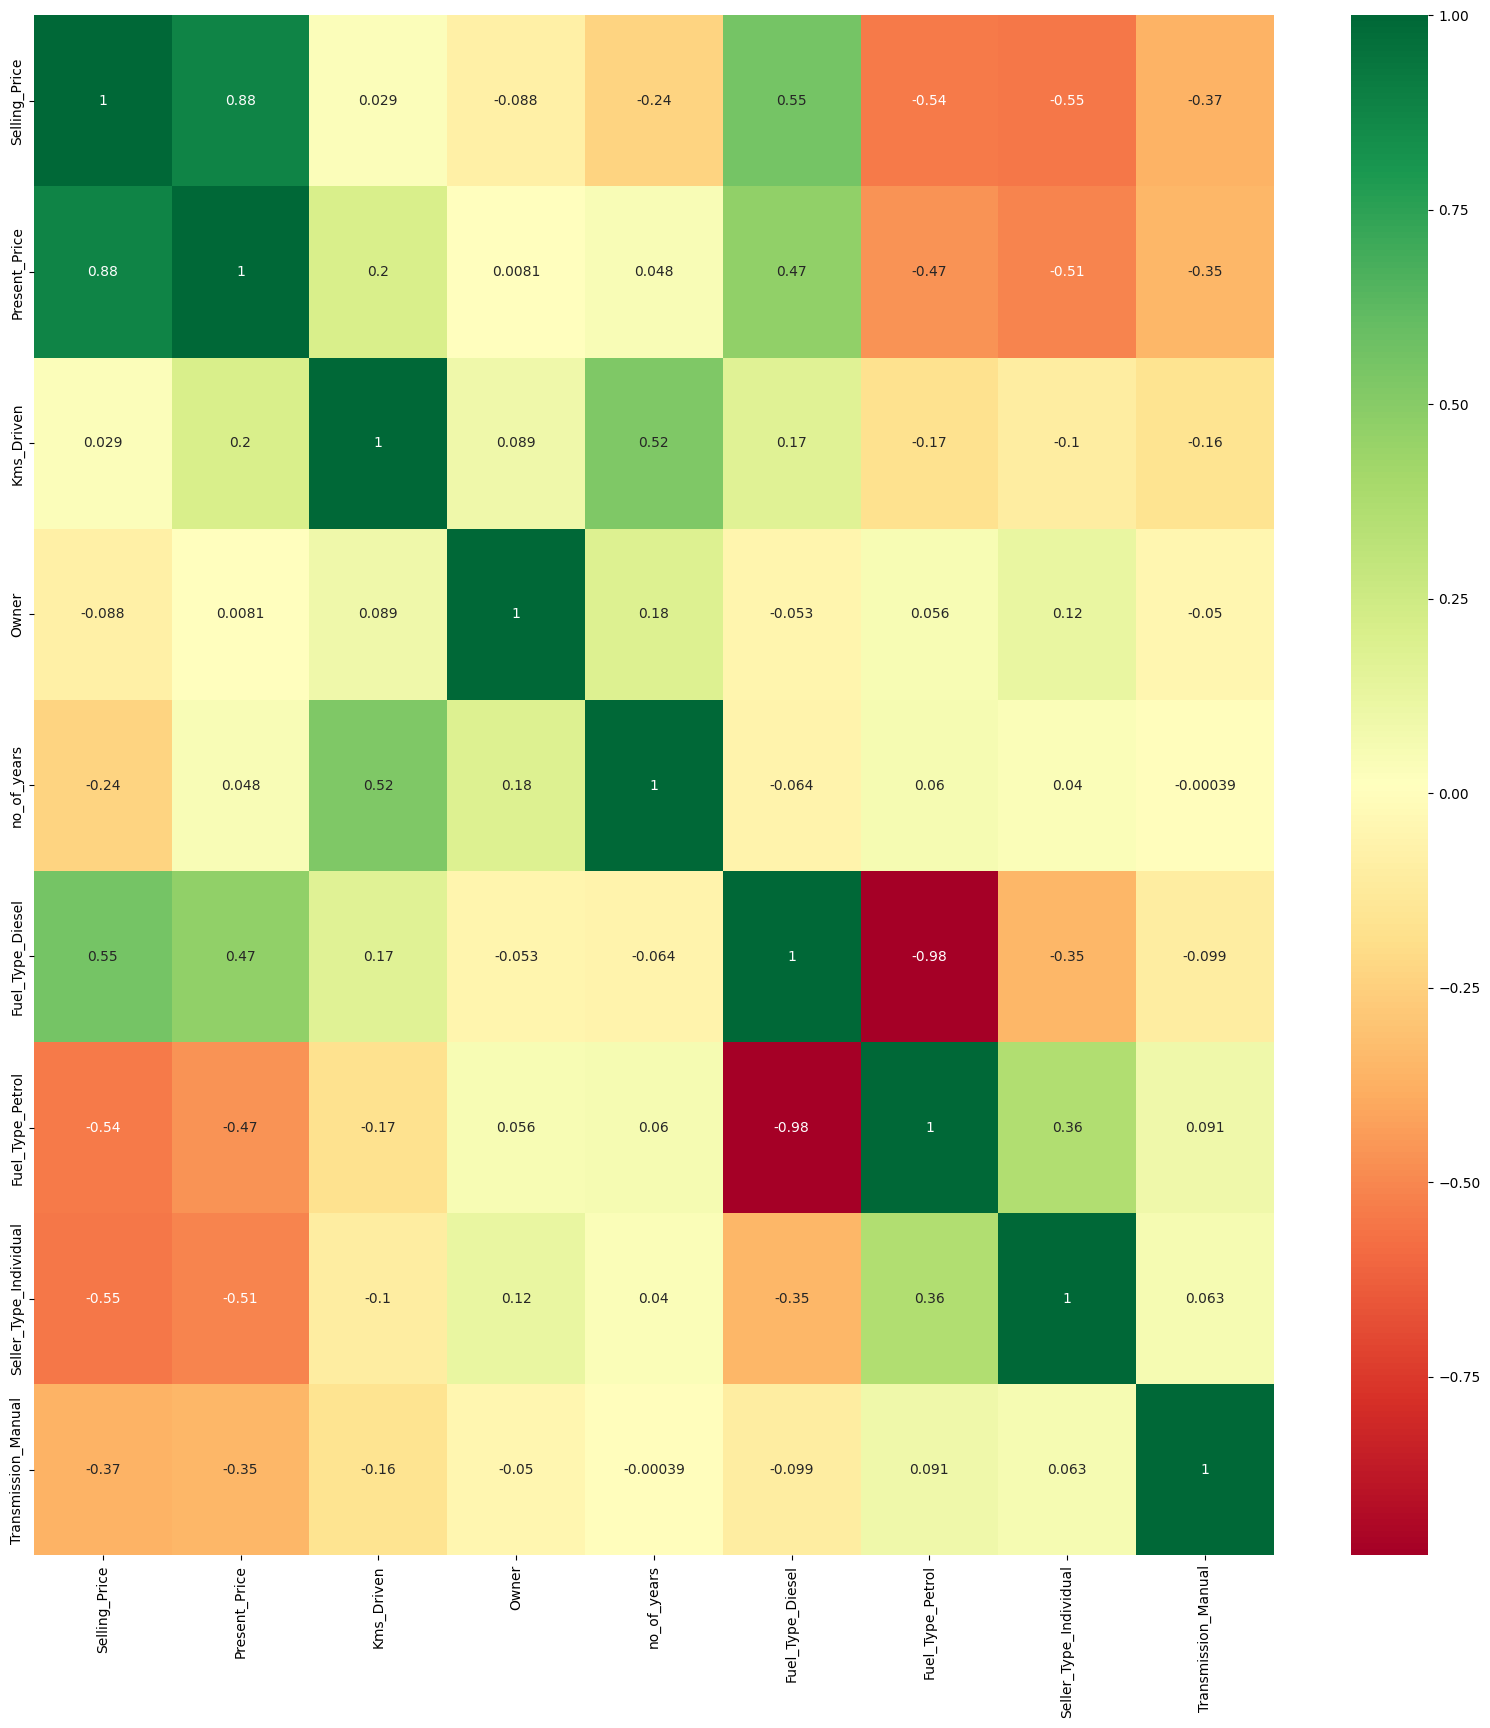

In [20]:
import matplotlib.pyplot as plt
corrmat = final.corr()
topfeatures = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(final[topfeatures].corr(),annot=True,cmap = 'RdYlGn')

In [21]:
final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [22]:
x = final.iloc[:,1:]

In [23]:
y= final.iloc[:,0]

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

In [25]:
model = ExtraTreesRegressor()

In [26]:
model.fit(x,y)

ExtraTreesRegressor()

In [27]:
model.feature_importances_

array([4.01614711e-01, 4.34641917e-02, 3.67075137e-04, 7.65101444e-02,
       2.09396121e-01, 1.66231343e-02, 1.19031734e-01, 1.32992888e-01])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
model = StandardScaler()
tx_train = model.fit_transform(x_train)
tx_test = model.transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(tx_train,y_train)

LinearRegression()

In [34]:
from sklearn.model_selection import cross_val_score
n = cross_val_score(model,tx_train,y_train,cv=10,scoring = 'neg_mean_squared_error')
n.max()

-2.134654113420705

In [47]:
pred = model.predict(tx_test)
model.score(tx_test,y_test)

0.8592801282668827

In [36]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
s = r2_score(y_test,pred)
print(s)
j = mean_squared_error(y_test,pred)
print(j)
h = mean_absolute_error(y_test,pred)
print(h)

0.8625051856306917
4.304674917625633
1.2097111089396553


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [38]:
rf_random = RandomForestRegressor()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

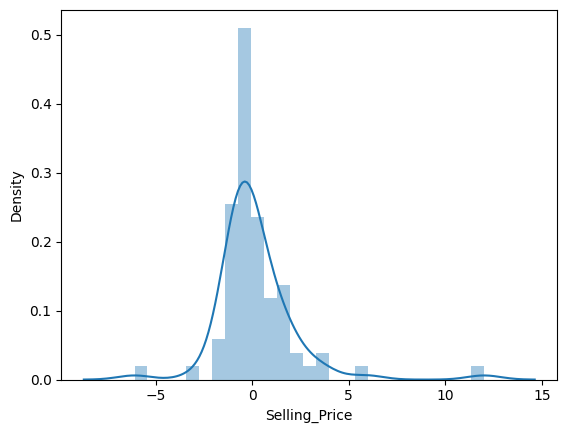

In [39]:
sns.distplot(y_test-pred)

In [48]:
rf_random.fit(tx_train,y_train)
rf_random.score(tx_test,y_test)

0.9176140021479046

In [40]:
from sklearn.linear_model import SGDRegressor


In [41]:
model = SGDRegressor()

model.fit(tx_train,y_train)

In [42]:
model.fit(tx_train,y_train)

SGDRegressor()

In [43]:
pred=model.predict(tx_test)

In [49]:
r2_score(y_test,pred)

0.8592801282668827

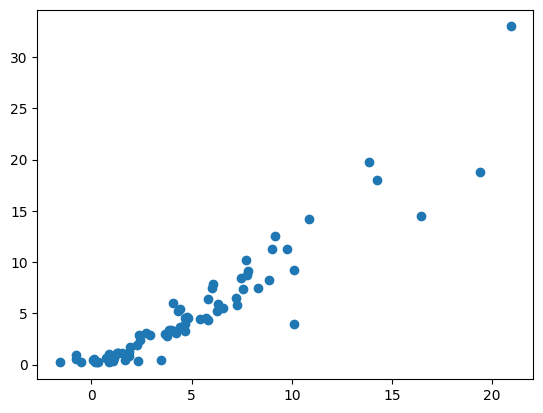

In [45]:
plt.scatter(pred,y_test)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Selling_Price'>

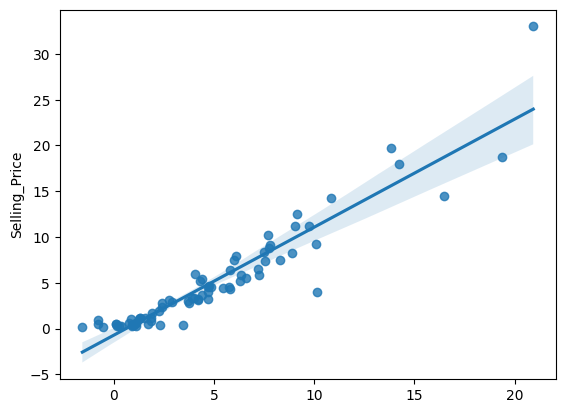

In [46]:
sns.regplot(pred,y_test)

In [52]:
clfr = DecisionTreeRegressor()
clfr.fit(tx_train,y_train)
clfr.score(tx_test,y_test)

0.917409296271282

### so after testing all the model we analysed that the randomforest regressor gives the best result